In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from sequential_sampler import SMCSampler1

import torch
from torch.distributions import MultivariateNormal

In [3]:
N = 1000
x0 = torch.randn(N,1)
w0 = torch.ones(N)/N
T = 30
target_log_densities = [MultivariateNormal(torch.tensor([float(i)]), torch.eye(1)).log_prob for i in range(T)]
smc = SMCSampler1(target_log_densities, x0, w0)

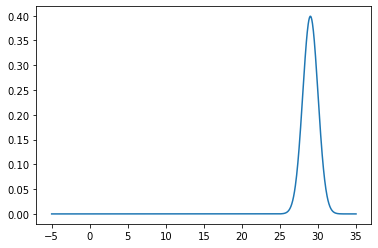

In [4]:
from IPython.display import clear_output
import matplotlib.pyplot as plt
linspace= torch.linspace(-5, 35,1000).unsqueeze(-1)
for i in range(T):
    clear_output(wait=True)
    plt.figure()
    plt.plot(linspace, torch.exp(target_log_densities[i](linspace)))
    plt.show()

In [5]:
smc.sample()

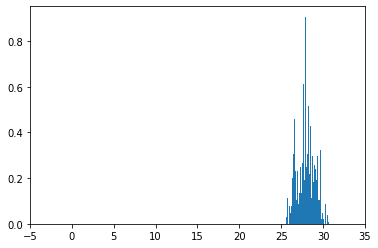

In [6]:
for particle_set in smc.particles:
    clear_output(wait=True)
    plt.figure()
    plt.hist(particle_set.detach().numpy(), bins= 50, density = True)
    plt.xlim((-5,35))
    plt.show()

In [7]:
smc.print_shape_particles()

AttributeError: 'SMCSampler1' object has no attribute 'print_shape_particles'